In [5]:
# Imports.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from data_utils import CSVData
from dynamical_systems import linear_system, andronov_hopf, vec_roessler_attractor
from nets import EulerN
from torch.utils.data import DataLoader
from utils import euler, plot_phase_portrait, plot_3d_trajectory, train_valid_loader

# 1. Linear system.

In [2]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=20
h=1

# Initialise the model.
model = EulerN(input_size, num_param, hidden_size, h)

In [3]:
# Load data.
dataset = CSVData(csv_file_path='first_model.csv')
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [4]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.051332300
[1,  4000] loss: 0.000087738
[1,  6000] loss: 0.000035431
[1,  8000] loss: 0.000019521
[1, 10000] loss: 0.000012503
[2,  2000] loss: 0.000009267
[2,  4000] loss: 0.000007541
[2,  6000] loss: 0.000006653
[2,  8000] loss: 0.000006311
[2, 10000] loss: 0.000006266
[3,  2000] loss: 0.000006555
[3,  4000] loss: 0.000006611
[3,  6000] loss: 0.000007076
[3,  8000] loss: 0.000007441
[3, 10000] loss: 0.000007740
[4,  2000] loss: 0.000007781
[4,  4000] loss: 0.000006737
[4,  6000] loss: 0.000006153
[4,  8000] loss: 0.000005751
[4, 10000] loss: 0.000005342
[5,  2000] loss: 0.000005325
[5,  4000] loss: 0.000005359
[5,  6000] loss: 0.000005223
[5,  8000] loss: 0.000005096
[5, 10000] loss: 0.000004991
[6,  2000] loss: 0.000004879
[6,  4000] loss: 0.000004671
[6,  6000] loss: 0.000004562
[6,  8000] loss: 0.000004565
[6, 10000] loss: 0.000004526
[7,  2000] loss: 0.000004262
[7,  4000] loss: 0.000004070
[7,  6000] loss: 0.000004098
[7,  8000] loss: 0.000004163
[7, 10000] los

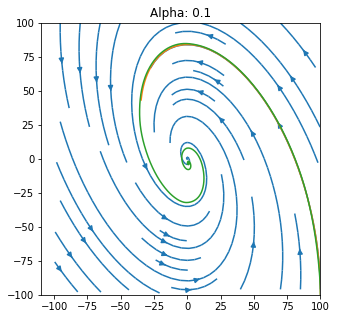

In [5]:
alpha = 0.1

plot_phase_portrait(linear_system, alpha, model, 100)

# 2. Andronov-Hopf system

-----------------------------------------------------------
bs=250 hs=100 lr=0.001 wd=0.0 nhl=3
[ 1,  200] loss: 0.000780767406286
[ 1,  400] loss: 0.000250780795200
[ 1,  600] loss: 0.000117001557878
[ 1,  800] loss: 0.000111765457546
[ 1, 1000] loss: 0.000126571895894
[ 1, 1200] loss: 0.000084635501996
[ 1, 1400] loss: 0.000080831175055
[ 1, 1600] loss: 0.000065983197094
[ 1, 1800] loss: 0.000060058717922
[ 1, 2000] loss: 0.000039107728028
[ 1, 2200] loss: 0.000050264962986
[ 1, 2400] loss: 0.000031089181796
[ 1, 2600] loss: 0.000019335602364
[ 1, 2800] loss: 0.000036494321351
[ 1, 3000] loss: 0.000028186494141
[ 2,  200] loss: 0.000022601339762
[ 2,  400] loss: 0.000024105702381
[ 2,  600] loss: 0.000020975671107
[ 2,  800] loss: 0.000017516321667
[ 2, 1000] loss: 0.000013886251786
[ 2, 1200] loss: 0.000014164669431
[ 2, 1400] loss: 0.000013704549193
[ 2, 1600] loss: 0.000015342483488
[ 2, 1800] loss: 0.000017013781820
[ 2, 2000] loss: 0.000013147059964
[ 2, 2200] loss: 0.0000112238

[16, 1600] loss: 0.000001963779333
[16, 1800] loss: 0.000001632045843
[16, 2000] loss: 0.000002115604981
[16, 2200] loss: 0.000001597256641
[16, 2400] loss: 0.000001782127096
[16, 2600] loss: 0.000001538384433
[16, 2800] loss: 0.000001348187854
[16, 3000] loss: 0.000001570347053
[17,  200] loss: 0.000001650938398
[17,  400] loss: 0.000001851953650
[17,  600] loss: 0.000001536841475
[17,  800] loss: 0.000001743763479
[17, 1000] loss: 0.000001384975954
[17, 1200] loss: 0.000001521133356
[17, 1400] loss: 0.000001523605722
[17, 1600] loss: 0.000003917151145
[17, 1800] loss: 0.000001446128947
[17, 2000] loss: 0.000001926623377
[17, 2200] loss: 0.000002367549270
[17, 2400] loss: 0.000001702228781
[17, 2600] loss: 0.000001439936141
[17, 2800] loss: 0.000001897013533
[17, 3000] loss: 0.000001448212588
[18,  200] loss: 0.000001748805633
[18,  400] loss: 0.000001441353475
[18,  600] loss: 0.000001766647404
[18,  800] loss: 0.000001469940067
[18, 1000] loss: 0.000001351272543
[18, 1200] loss: 0.0

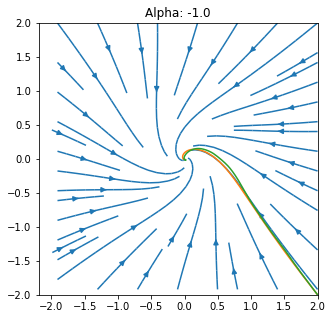

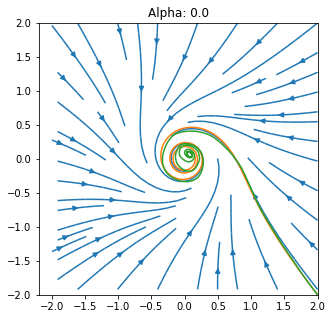

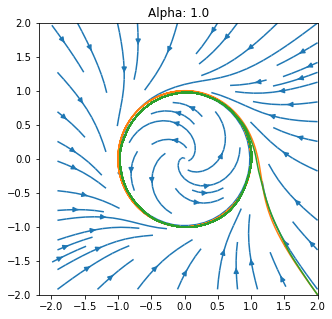

In [7]:
h = 1

hss = [100]
bss = [250]
lrs = [0.001]
wds = [0.0]
nhls = [3]
epochs = 30


for bs in bss:
    dataset = CSVData(csv_file_path='second_model.csv')    
    train_loader, valid_loader = train_valid_loader(dataset, bs=bs)
    
    for hs in hss:
        for lr in lrs:
            for wd in wds:
                for nhl in nhls:
                    print('-----------------------------------------------------------')
                    print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 
                          'wd=' + str(wd), 'nhl=' + str(nhl))
                    model = EulerN(2, 1, hs, h, nhl)
                    criterion = nn.MSELoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    
                    for epoch in range(epochs):  # loop over the dataset multiple times
                        running_loss = 0.0
                        for i, data in enumerate(train_loader, 0):
                            # get the inputs; data is a list of [inputs, labels]
                            inputs, params, labels = data
                            
                            # zero the parameter gradients
                            optimizer.zero_grad()

                            # forward + backward + optimize
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            optimizer.step()

                            # print statistics
                            running_loss += loss.item()
                            if i % 200 == 199:    # print every 2000 mini-batches
                                print('[%2d, %4d] loss: %.15f' %
                                        (epoch + 1, i + 1, running_loss / 200))
                                running_loss = 0.0
                                
                    print('Finished Training')
                        
                        
                    with torch.no_grad():
                        train_loss = 0.0
                        valid_loss = 0.0
                        criterion = nn.MSELoss()
                            
                        for data in train_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            train_loss += loss.item()
                                                        
                        for data in valid_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            valid_loss += loss.item()
                                
                        train_loss /= len(train_loader)
                        valid_loss /= len(valid_loader)
                                                        
                        print('Train loss: %.15f' % (train_loss,))
                        print('Valid loss: %.15f' % (valid_loss,))
                        
                        plot_phase_portrait(andronov_hopf, -1., model, 2)
                        plot_phase_portrait(andronov_hopf,  0., model, 2)
                        plot_phase_portrait(andronov_hopf,  1., model, 2)

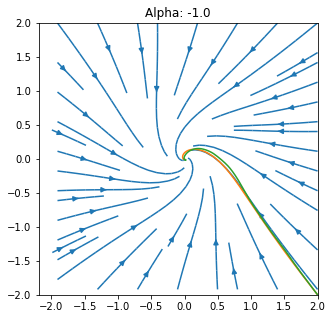

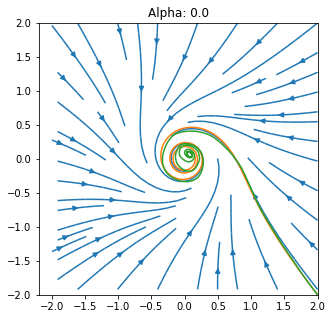

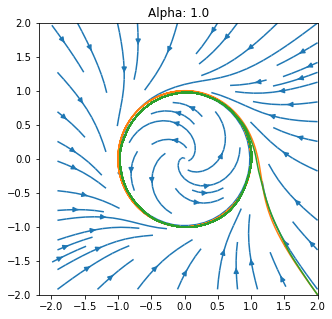

In [8]:
plot_phase_portrait(andronov_hopf, -1.0, model, 2)
plot_phase_portrait(andronov_hopf,  0.0, model, 2)
plot_phase_portrait(andronov_hopf,  1.0, model, 2)

# 3. Roessler attractor

-----------------------------------------------------------
bs=1000 hs=100 lr=0.1 wd=0.0 nhl=3
[ 1,  200] loss: 0.305851381588727
[ 1,  400] loss: 0.103614313453436
[ 1,  600] loss: 0.060989651465788
[ 1,  800] loss: 0.089945653225295
[ 1, 1000] loss: 0.014945109314285
[ 1, 1200] loss: 0.010818933838164
[ 1, 1400] loss: 0.037186012787861
[ 1, 1600] loss: 0.080967300960328
[ 1, 1800] loss: 0.063399363550125
[ 1, 2000] loss: 0.049431612797780
[ 1, 2200] loss: 0.031531257391907
[ 1, 2400] loss: 0.006465476003359
[ 1, 2600] loss: 0.007722466171253
[ 1, 2800] loss: 0.009661483331583
[ 1, 3000] loss: 0.007945503953961
[ 1, 3200] loss: 0.016251507191337
[ 1, 3400] loss: 0.050586049551493
[ 1, 3600] loss: 0.171869397130795
[ 1, 3800] loss: 0.045761401676573
[ 1, 4000] loss: 0.012493740979116
[ 1, 4200] loss: 0.011499147375580
[ 1, 4400] loss: 0.021930030427175
[ 1, 4600] loss: 0.011479026848683
[ 1, 4800] loss: 0.008465527776862
[ 2,  200] loss: 0.016058966427809
[ 2,  400] loss: 0.00851615088

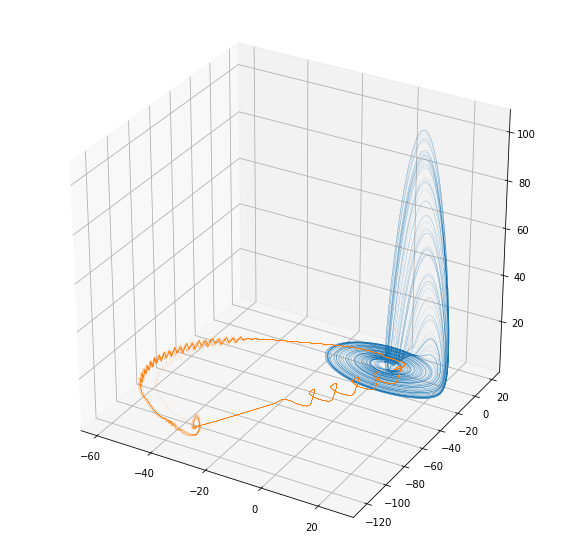

-----------------------------------------------------------
bs=1000 hs=100 lr=0.1 wd=0.0 nhl=5
[ 1,  200] loss: 0.171417390520219
[ 1,  400] loss: 0.058314875734504
[ 1,  600] loss: 0.035176048105350
[ 1,  800] loss: 0.049851933174068
[ 1, 1000] loss: 0.015508465490420
[ 1, 1200] loss: 0.010734723843052
[ 1, 1400] loss: 0.007013268768205
[ 1, 1600] loss: 0.073517311310861
[ 1, 1800] loss: 0.007191686708829
[ 1, 2000] loss: 0.017189836848411
[ 1, 2200] loss: 0.013785163439461
[ 1, 2400] loss: 0.017101166880457
[ 1, 2600] loss: 0.004851752496907
[ 1, 2800] loss: 0.007264697822975
[ 1, 3000] loss: 0.010810204439913
[ 1, 3200] loss: 0.006939155031578
[ 1, 3400] loss: 0.032869582447456
[ 1, 3600] loss: 0.011493226047605
[ 1, 3800] loss: 0.024101825794787
[ 1, 4000] loss: 0.020044970422168
[ 1, 4200] loss: 0.010079442769056
[ 1, 4400] loss: 0.009004978243611
[ 1, 4600] loss: 0.009138583227177
[ 1, 4800] loss: 0.005990524230874
[ 2,  200] loss: 0.022823077605572
[ 2,  400] loss: 0.00921411515

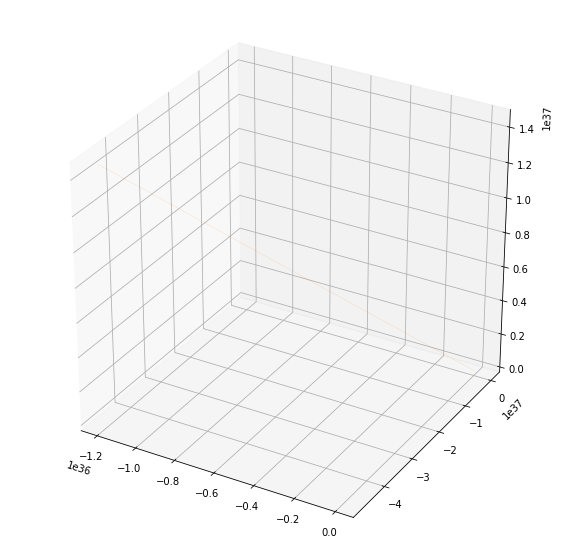

-----------------------------------------------------------
bs=1000 hs=100 lr=0.01 wd=0.0 nhl=3
[ 1,  200] loss: 0.200055133891292
[ 1,  400] loss: 0.026160613008542
[ 1,  600] loss: 0.015600340116071
[ 1,  800] loss: 0.005575402922113
[ 1, 1000] loss: 0.008490212940378
[ 1, 1200] loss: 0.003789049053739
[ 1, 1400] loss: 0.008263065229694
[ 1, 1600] loss: 0.004201587512507
[ 1, 1800] loss: 0.004384667324193
[ 1, 2000] loss: 0.004643821197387
[ 1, 2200] loss: 0.002049919338606
[ 1, 2400] loss: 0.003158046447206
[ 1, 2600] loss: 0.003126227290486
[ 1, 2800] loss: 0.004322756253241
[ 1, 3000] loss: 0.015971430902136
[ 1, 3200] loss: 0.002837233173923
[ 1, 3400] loss: 0.003331650532782
[ 1, 3600] loss: 0.002892771008483
[ 1, 3800] loss: 0.012896661456616
[ 1, 4000] loss: 0.001870730101364
[ 1, 4200] loss: 0.002022583679645
[ 1, 4400] loss: 0.002729162665346
[ 1, 4600] loss: 0.003376841732534
[ 1, 4800] loss: 0.003899645513447
[ 2,  200] loss: 0.005332816693990
[ 2,  400] loss: 0.0028547092

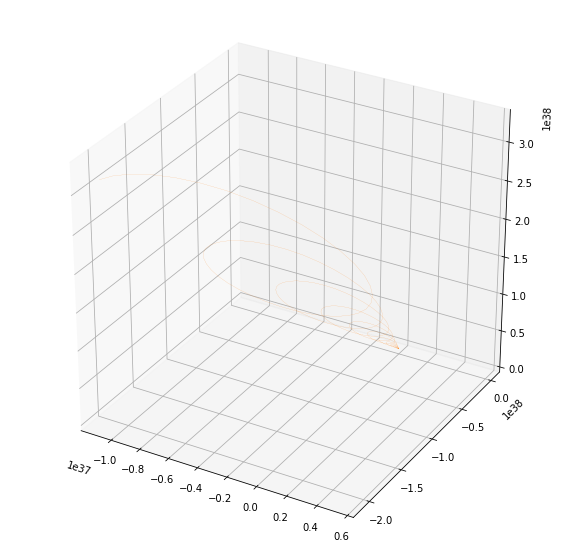

-----------------------------------------------------------
bs=1000 hs=100 lr=0.01 wd=0.0 nhl=5
[ 1,  200] loss: 0.260985845625401
[ 1,  400] loss: 0.030050392873818
[ 1,  600] loss: 0.013717029364780
[ 1,  800] loss: 0.006619508063886
[ 1, 1000] loss: 0.004837436062517
[ 1, 1200] loss: 0.003579670433828
[ 1, 1400] loss: 0.003478403793124
[ 1, 1600] loss: 0.004537087052886
[ 1, 1800] loss: 0.004244844070345
[ 1, 2000] loss: 0.003855969962897
[ 1, 2200] loss: 0.003681950724276
[ 1, 2400] loss: 0.002169646286929
[ 1, 2600] loss: 0.003283835818875
[ 1, 2800] loss: 0.002413470764004
[ 1, 3000] loss: 0.001630657133501
[ 1, 3200] loss: 0.002730292077176
[ 1, 3400] loss: 0.003146187491948
[ 1, 3600] loss: 0.002986912440683
[ 1, 3800] loss: 0.004742694262532
[ 1, 4000] loss: 0.001518356597080
[ 1, 4200] loss: 0.001891195224161
[ 1, 4400] loss: 0.002878096597269
[ 1, 4600] loss: 0.007606799961068
[ 1, 4800] loss: 0.001452067343052
[ 2,  200] loss: 0.002213984529953
[ 2,  400] loss: 0.0025606465

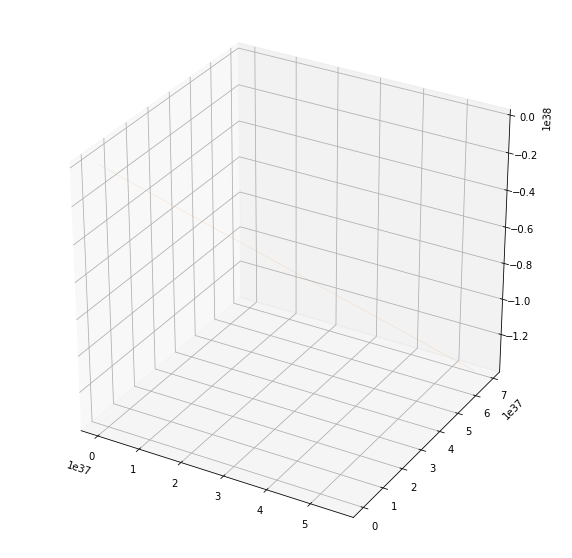

-----------------------------------------------------------
bs=1000 hs=100 lr=0.001 wd=0.0 nhl=3
[ 1,  200] loss: 0.560511097386479
[ 1,  400] loss: 0.324218423366547
[ 1,  600] loss: 0.165975536601618
[ 1,  800] loss: 0.098694575806148
[ 1, 1000] loss: 0.071368290381506
[ 1, 1200] loss: 0.048610040324274
[ 1, 1400] loss: 0.033681930776220
[ 1, 1600] loss: 0.024973443516064
[ 1, 1800] loss: 0.021518320082687
[ 1, 2000] loss: 0.016786152690765
[ 1, 2200] loss: 0.012596142081893
[ 1, 2400] loss: 0.009995362841291
[ 1, 2600] loss: 0.008994565986795
[ 1, 2800] loss: 0.008223426942714
[ 1, 3000] loss: 0.006433584413026
[ 1, 3200] loss: 0.005741641050554
[ 1, 3400] loss: 0.005318256172759
[ 1, 3600] loss: 0.004461850494554
[ 1, 3800] loss: 0.004600938550429
[ 1, 4000] loss: 0.003882286762528
[ 1, 4200] loss: 0.003850422795222
[ 1, 4400] loss: 0.003268751641153
[ 1, 4600] loss: 0.003327815564699
[ 1, 4800] loss: 0.002462006847782
[ 2,  200] loss: 0.002635617098131
[ 2,  400] loss: 0.002553630

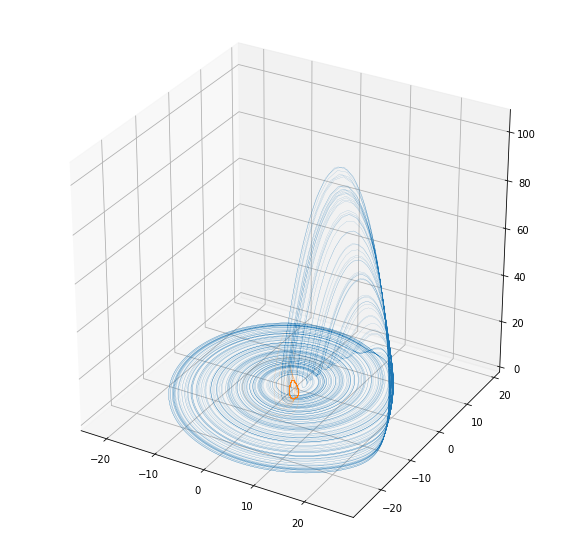

-----------------------------------------------------------
bs=1000 hs=100 lr=0.001 wd=0.0 nhl=5
[ 1,  200] loss: 0.598807985745370
[ 1,  400] loss: 0.448184064403176
[ 1,  600] loss: 0.317004074491560
[ 1,  800] loss: 0.212064077388495
[ 1, 1000] loss: 0.143622331134975
[ 1, 1200] loss: 0.100838663401082
[ 1, 1400] loss: 0.070073489728384
[ 1, 1600] loss: 0.045395077522844
[ 1, 1800] loss: 0.038662896805909
[ 1, 2000] loss: 0.027148976518074
[ 1, 2200] loss: 0.022492699264549
[ 1, 2400] loss: 0.019994434063556
[ 1, 2600] loss: 0.014173583259690
[ 1, 2800] loss: 0.012868517062743
[ 1, 3000] loss: 0.010295033027069
[ 1, 3200] loss: 0.009528298169025
[ 1, 3400] loss: 0.009021471833112
[ 1, 3600] loss: 0.007543230039882
[ 1, 3800] loss: 0.006037480294472
[ 1, 4000] loss: 0.005118187036715
[ 1, 4200] loss: 0.004792155253817
[ 1, 4400] loss: 0.004018582030549
[ 1, 4600] loss: 0.004029789566703
[ 1, 4800] loss: 0.003629234062391
[ 2,  200] loss: 0.002873267210962
[ 2,  400] loss: 0.002888572

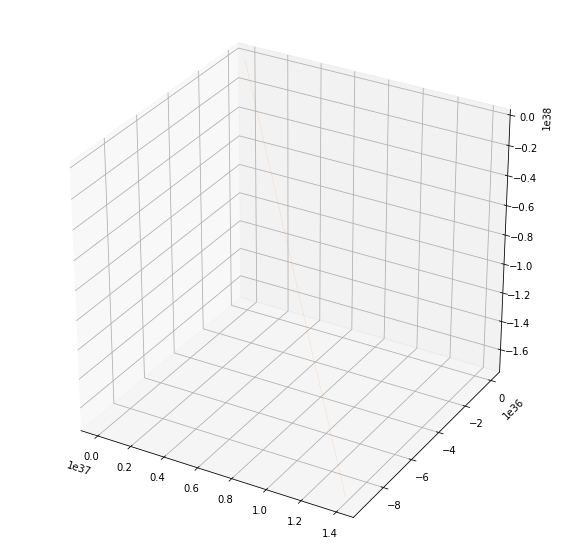

-----------------------------------------------------------
bs=1000 hs=100 lr=0.0001 wd=0.0 nhl=3
[ 1,  200] loss: 0.701999867409468
[ 1,  400] loss: 0.613926079198718
[ 1,  600] loss: 0.568907141871750
[ 1,  800] loss: 0.526389229223132
[ 1, 1000] loss: 0.523409415446222
[ 1, 1200] loss: 0.471321687921882
[ 1, 1400] loss: 0.452164974939078
[ 1, 1600] loss: 0.411013769917190
[ 1, 1800] loss: 0.409451331067830
[ 1, 2000] loss: 0.366886837016791
[ 1, 2200] loss: 0.339345815647393
[ 1, 2400] loss: 0.315035389848053
[ 1, 2600] loss: 0.304340114817023
[ 1, 2800] loss: 0.302700358564034
[ 1, 3000] loss: 0.272351494431496
[ 1, 3200] loss: 0.257566864062101
[ 1, 3400] loss: 0.232130950428545
[ 1, 3600] loss: 0.206323763756081
[ 1, 3800] loss: 0.198843382690102
[ 1, 4000] loss: 0.195387152489275
[ 1, 4200] loss: 0.193038804959506
[ 1, 4400] loss: 0.165712082395330
[ 1, 4600] loss: 0.148236956321634
[ 1, 4800] loss: 0.144476680187508
[ 2,  200] loss: 0.143214850639924
[ 2,  400] loss: 0.12294129

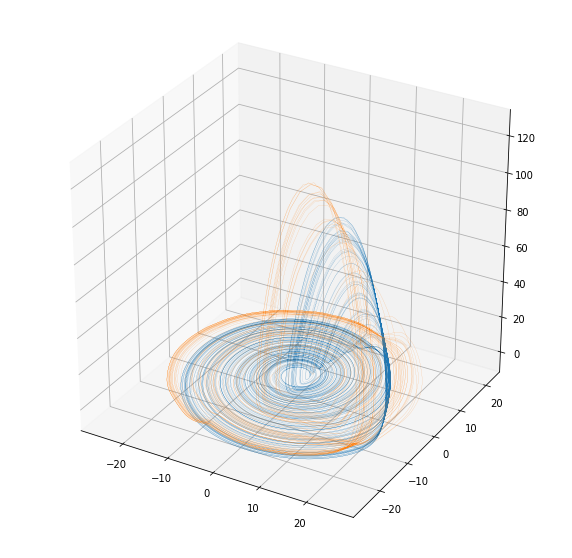

-----------------------------------------------------------
bs=1000 hs=100 lr=0.0001 wd=0.0 nhl=5
[ 1,  200] loss: 0.655471889525652
[ 1,  400] loss: 0.621052213311195
[ 1,  600] loss: 0.623124384284020
[ 1,  800] loss: 0.650115647949278
[ 1, 1000] loss: 0.587428551735356
[ 1, 1200] loss: 0.584521866403520
[ 1, 1400] loss: 0.539199033789337
[ 1, 1600] loss: 0.571020480357111
[ 1, 1800] loss: 0.520426780506968
[ 1, 2000] loss: 0.545351722277701
[ 1, 2200] loss: 0.520636466182768
[ 1, 2400] loss: 0.475163179561496
[ 1, 2600] loss: 0.496518013700843
[ 1, 2800] loss: 0.491950481794775
[ 1, 3000] loss: 0.475224590525031
[ 1, 3200] loss: 0.418138626944274
[ 1, 3400] loss: 0.429658393524587
[ 1, 3600] loss: 0.433790838439018
[ 1, 3800] loss: 0.405260006301105
[ 1, 4000] loss: 0.387838226277381
[ 1, 4200] loss: 0.401102063506842
[ 1, 4400] loss: 0.381385012175888
[ 1, 4600] loss: 0.335329412184656
[ 1, 4800] loss: 0.334740377236158
[ 2,  200] loss: 0.359118883069605
[ 2,  400] loss: 0.31147279

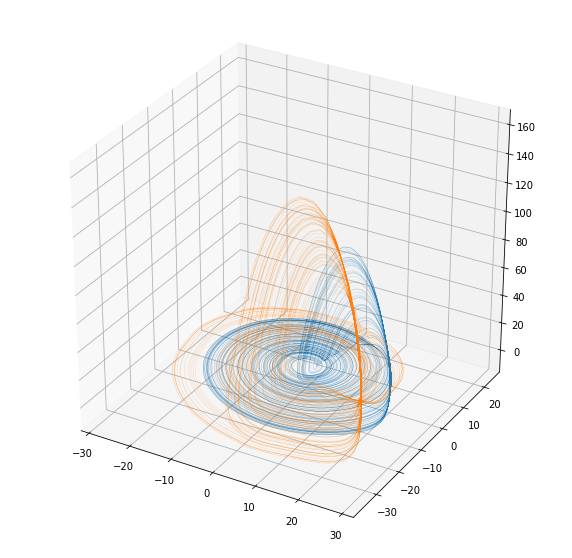

-----------------------------------------------------------
bs=1000 hs=200 lr=0.1 wd=0.0 nhl=3
[ 1,  200] loss: 0.533952993201092
[ 1,  400] loss: 0.110692560056923
[ 1,  600] loss: 0.086544702090323
[ 1,  800] loss: 0.038959349719808
[ 1, 1000] loss: 0.037107525599422
[ 1, 1200] loss: 0.031601165517932
[ 1, 1400] loss: 0.033102363067446
[ 1, 1600] loss: 0.022091639114078
[ 1, 1800] loss: 0.026371429467108
[ 1, 2000] loss: 0.082697176595684
[ 1, 2200] loss: 0.025709716634592
[ 1, 2400] loss: 0.017461958511849
[ 1, 2600] loss: 0.027828101782361
[ 1, 2800] loss: 0.010531980837113
[ 1, 3000] loss: 1.609248701069737
[ 1, 3200] loss: 0.121478925989941
[ 1, 3400] loss: 0.071674831295386
[ 1, 3600] loss: 0.025749095822684
[ 1, 3800] loss: 0.017771394127049
[ 1, 4000] loss: 0.038571327971295
[ 1, 4200] loss: 0.032536332854070
[ 1, 4400] loss: 0.015521314423531
[ 1, 4600] loss: 0.041414652212989
[ 1, 4800] loss: 0.016396673527779
[ 2,  200] loss: 0.035272483709268
[ 2,  400] loss: 0.03564982413

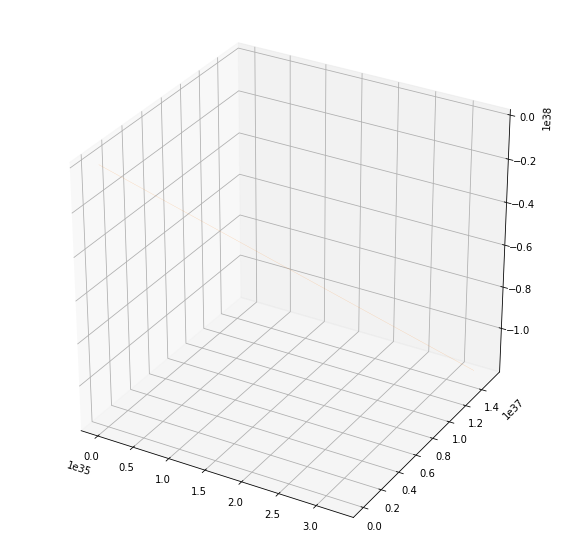

-----------------------------------------------------------
bs=1000 hs=200 lr=0.1 wd=0.0 nhl=5
[ 1,  200] loss: 0.164937511975877
[ 1,  400] loss: 0.064257154583465
[ 1,  600] loss: 0.050239441905869
[ 1,  800] loss: 0.024600452429149
[ 1, 1000] loss: 0.057463730182499
[ 1, 1200] loss: 0.005104653182207
[ 1, 1400] loss: 0.021132276555290
[ 1, 1600] loss: 0.016598189954530
[ 1, 1800] loss: 0.023912410905468
[ 1, 2000] loss: 0.016049297620775
[ 1, 2200] loss: 0.009195825704955
[ 1, 2400] loss: 0.018292817596812
[ 1, 2600] loss: 0.007184052750235
[ 1, 2800] loss: 0.081494816567865
[ 1, 3000] loss: 0.022899691818748
[ 1, 3200] loss: 0.015234215015080
[ 1, 3400] loss: 0.008775888355740
[ 1, 3600] loss: 0.023975190915517
[ 1, 3800] loss: 0.015655071156216
[ 1, 4000] loss: 0.022286444567726
[ 1, 4200] loss: 0.014228993551806
[ 1, 4400] loss: 0.002968255416199
[ 1, 4600] loss: 0.004612965342239
[ 1, 4800] loss: 0.009776752643520
[ 2,  200] loss: 0.002656123243505
[ 2,  400] loss: 0.01097936938

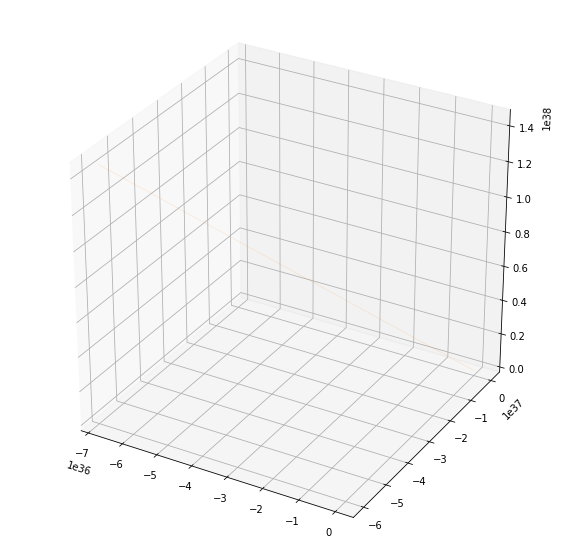

-----------------------------------------------------------
bs=1000 hs=200 lr=0.01 wd=0.0 nhl=3
[ 1,  200] loss: 0.168314939655829
[ 1,  400] loss: 0.022897531362250
[ 1,  600] loss: 0.009384877328412
[ 1,  800] loss: 0.007182333897799
[ 1, 1000] loss: 0.008842016023991
[ 1, 1200] loss: 0.014303145203448
[ 1, 1400] loss: 0.003604764043412
[ 1, 1600] loss: 0.018701101769693
[ 1, 1800] loss: 0.005817715555604
[ 1, 2000] loss: 0.003886731475359
[ 1, 2200] loss: 0.003016676624538
[ 1, 2400] loss: 0.005618757283373
[ 1, 2600] loss: 0.006745303074422
[ 1, 2800] loss: 0.008598247388145
[ 1, 3000] loss: 0.004871893704112
[ 1, 3200] loss: 0.003248775370739
[ 1, 3400] loss: 0.012647269214795
[ 1, 3600] loss: 0.003918178848398
[ 1, 3800] loss: 0.004961556408671
[ 1, 4000] loss: 0.002883297261433
[ 1, 4200] loss: 0.007353994479054
[ 1, 4400] loss: 0.003562866262801
[ 1, 4600] loss: 0.004377905515139
[ 1, 4800] loss: 0.002879125601175
[ 2,  200] loss: 0.005622301694821
[ 2,  400] loss: 0.0128402358

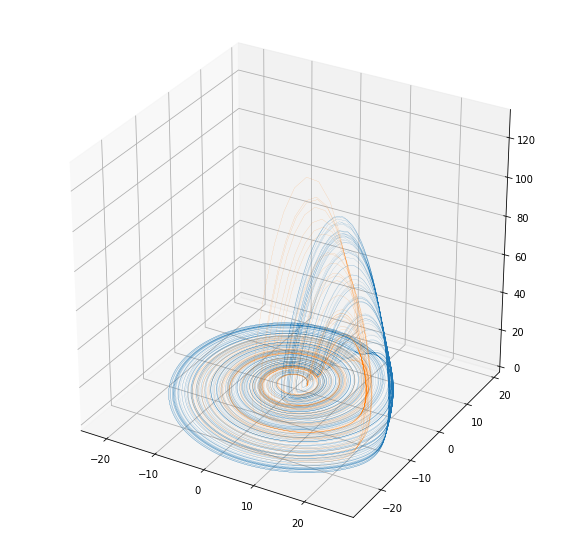

-----------------------------------------------------------
bs=1000 hs=200 lr=0.01 wd=0.0 nhl=5
[ 1,  200] loss: 0.216952056195587
[ 1,  400] loss: 0.020474532407243
[ 1,  600] loss: 0.007768944029231
[ 1,  800] loss: 0.007322694822215
[ 1, 1000] loss: 0.003705932257872
[ 1, 1200] loss: 0.003059869612043
[ 1, 1400] loss: 0.003679094228719
[ 1, 1600] loss: 0.007878993808699
[ 1, 1800] loss: 0.004931908208819
[ 1, 2000] loss: 0.002598830023489
[ 1, 2200] loss: 0.006064773298858
[ 1, 2400] loss: 0.002276385444420
[ 1, 2600] loss: 0.002584649528144
[ 1, 2800] loss: 0.005352444186719
[ 1, 3000] loss: 0.002151021019963
[ 1, 3200] loss: 0.005807210083149
[ 1, 3400] loss: 0.002059730040201
[ 1, 3600] loss: 0.006161688321154
[ 1, 3800] loss: 0.002067127064511
[ 1, 4000] loss: 0.003869322555693
[ 1, 4200] loss: 0.019601572652464
[ 1, 4400] loss: 0.009522456150153
[ 1, 4600] loss: 0.000984846919018
[ 1, 4800] loss: 0.002013368856424
[ 2,  200] loss: 0.003311516687681
[ 2,  400] loss: 0.0015637996

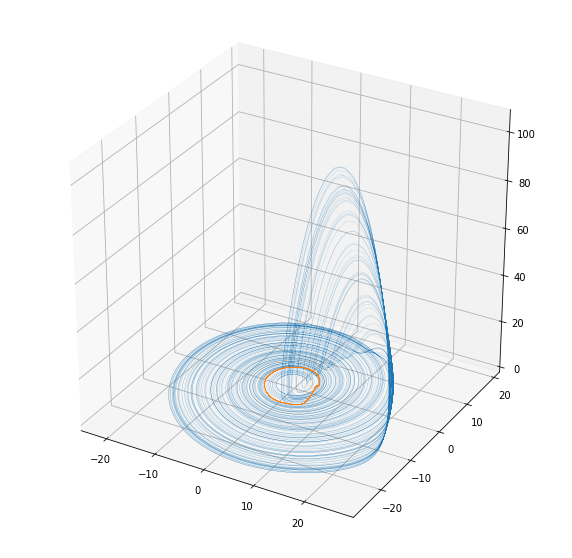

-----------------------------------------------------------
bs=1000 hs=200 lr=0.001 wd=0.0 nhl=3
[ 1,  200] loss: 0.430228094346821
[ 1,  400] loss: 0.191497907489538
[ 1,  600] loss: 0.094802471520379
[ 1,  800] loss: 0.065257896850817
[ 1, 1000] loss: 0.041793785798363
[ 1, 1200] loss: 0.030893312097760
[ 1, 1400] loss: 0.020776475082384
[ 1, 1600] loss: 0.017017875216552
[ 1, 1800] loss: 0.011405206555501
[ 1, 2000] loss: 0.009308289231849
[ 1, 2200] loss: 0.007474742080376
[ 1, 2400] loss: 0.006402745130763
[ 1, 2600] loss: 0.005435513045813
[ 1, 2800] loss: 0.004494683420635
[ 1, 3000] loss: 0.003751308172650
[ 1, 3200] loss: 0.003331469483528
[ 1, 3400] loss: 0.002797922232712
[ 1, 3600] loss: 0.003273498556518
[ 1, 3800] loss: 0.002484935760876
[ 1, 4000] loss: 0.002357522984967
[ 1, 4200] loss: 0.002320572965691
[ 1, 4400] loss: 0.002110714878218
[ 1, 4600] loss: 0.001914829525485
[ 1, 4800] loss: 0.001651787563460
[ 2,  200] loss: 0.001666064364981
[ 2,  400] loss: 0.001624994

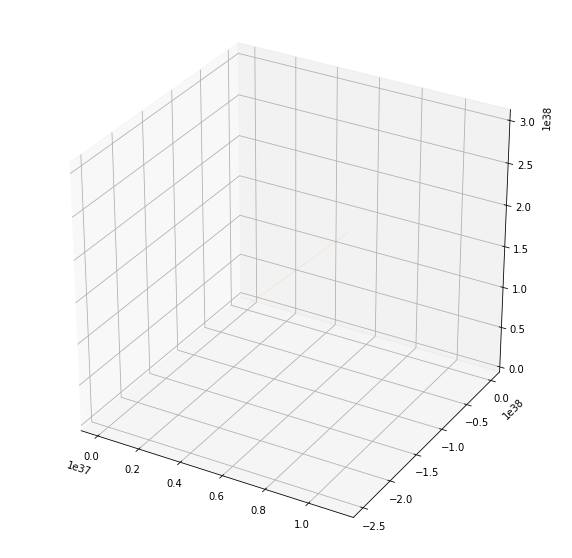

-----------------------------------------------------------
bs=1000 hs=200 lr=0.001 wd=0.0 nhl=5
[ 1,  200] loss: 0.553128592707217
[ 1,  400] loss: 0.348709302898496
[ 1,  600] loss: 0.195821015052497
[ 1,  800] loss: 0.104713834072463
[ 1, 1000] loss: 0.073022264416795
[ 1, 1200] loss: 0.050790992672555
[ 1, 1400] loss: 0.038807047677692
[ 1, 1600] loss: 0.028551133903675
[ 1, 1800] loss: 0.018922553835437
[ 1, 2000] loss: 0.015115580557613
[ 1, 2200] loss: 0.012246726735902
[ 1, 2400] loss: 0.009731751069194
[ 1, 2600] loss: 0.008452214605350
[ 1, 2800] loss: 0.007282542124740
[ 1, 3000] loss: 0.006447374843410
[ 1, 3200] loss: 0.004441703173507
[ 1, 3400] loss: 0.004060843620100
[ 1, 3600] loss: 0.003913094439195
[ 1, 3800] loss: 0.003044523435237
[ 1, 4000] loss: 0.002798085787217
[ 1, 4200] loss: 0.002853550116997
[ 1, 4400] loss: 0.002493639608438
[ 1, 4600] loss: 0.002049892825598
[ 1, 4800] loss: 0.002275682277832
[ 2,  200] loss: 0.001911868047318
[ 2,  400] loss: 0.001595986

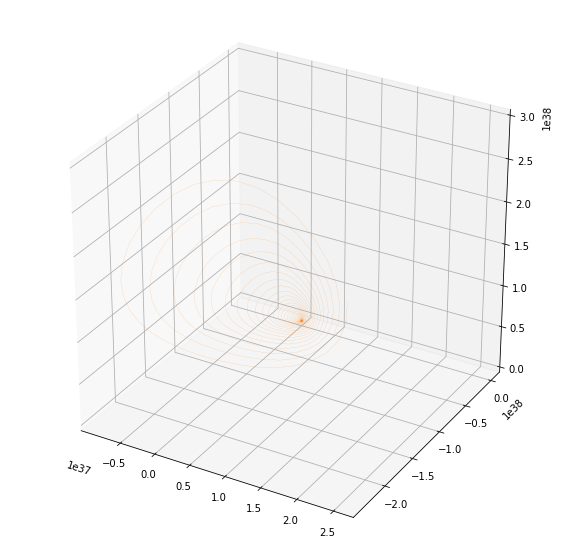

-----------------------------------------------------------
bs=1000 hs=200 lr=0.0001 wd=0.0 nhl=3
[ 1,  200] loss: 0.640429597012699
[ 1,  400] loss: 0.558884358517826
[ 1,  600] loss: 0.504119088780135
[ 1,  800] loss: 0.455521328486502
[ 1, 1000] loss: 0.419188904371113
[ 1, 1200] loss: 0.390242872834206
[ 1, 1400] loss: 0.327513424884528
[ 1, 1600] loss: 0.316201410312206
[ 1, 1800] loss: 0.262669865842909
[ 1, 2000] loss: 0.260877818912268
[ 1, 2200] loss: 0.230396496262401
[ 1, 2400] loss: 0.220569479726255
[ 1, 2600] loss: 0.198694563303143
[ 1, 2800] loss: 0.163826244166121
[ 1, 3000] loss: 0.150342539828271
[ 1, 3200] loss: 0.149180210065097
[ 1, 3400] loss: 0.129131777023431
[ 1, 3600] loss: 0.127561123548076
[ 1, 3800] loss: 0.114416562207043
[ 1, 4000] loss: 0.120136745804921
[ 1, 4200] loss: 0.104311065087095
[ 1, 4400] loss: 0.096331479945220
[ 1, 4600] loss: 0.084952546940185
[ 1, 4800] loss: 0.084521012911573
[ 2,  200] loss: 0.084837613976561
[ 2,  400] loss: 0.08054247

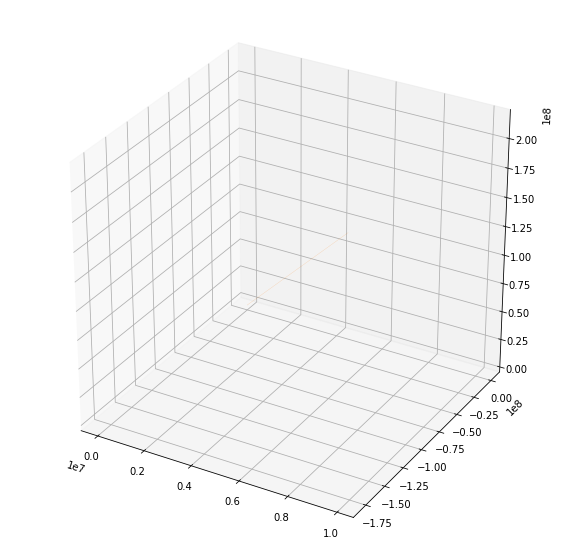

-----------------------------------------------------------
bs=1000 hs=200 lr=0.0001 wd=0.0 nhl=5
[ 1,  200] loss: 0.654034278541803
[ 1,  400] loss: 0.609340027049184
[ 1,  600] loss: 0.590743454545736
[ 1,  800] loss: 0.583216099478304
[ 1, 1000] loss: 0.596611299291253
[ 1, 1200] loss: 0.552264360003173
[ 1, 1400] loss: 0.524891260489821
[ 1, 1600] loss: 0.493264778070152
[ 1, 1800] loss: 0.467749386131763
[ 1, 2000] loss: 0.449532172009349
[ 1, 2200] loss: 0.433234211765230
[ 1, 2400] loss: 0.402601364906877
[ 1, 2600] loss: 0.398414769377559
[ 1, 2800] loss: 0.378018108643591
[ 1, 3000] loss: 0.348686170727015
[ 1, 3200] loss: 0.314701294600964
[ 1, 3400] loss: 0.288081476576626
[ 1, 3600] loss: 0.311383471041918
[ 1, 3800] loss: 0.290805151872337
[ 1, 4000] loss: 0.248006694111973
[ 1, 4200] loss: 0.227936895824969
[ 1, 4400] loss: 0.243466533683240
[ 1, 4600] loss: 0.209881967762485
[ 1, 4800] loss: 0.214202948492020
[ 2,  200] loss: 0.201343450099230
[ 2,  400] loss: 0.19436910

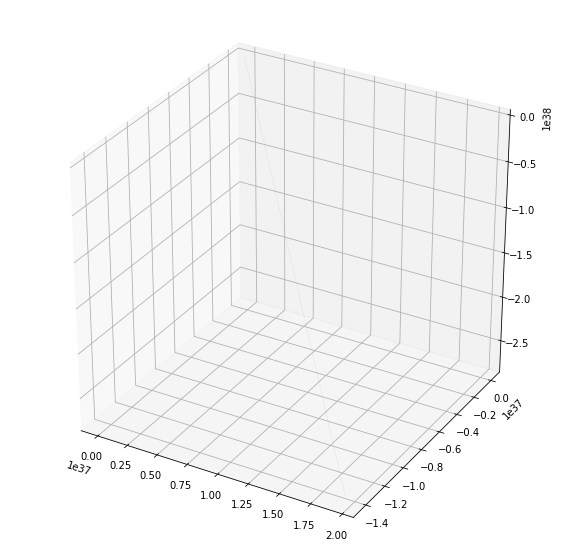

In [11]:
h = 1

hss = [100, 200]
bss = [1000]
lrs = [0.1, 0.01, 0.001, 0.0001]
wds = [0.0]
nhls = [3, 5]
epochs = 3


for bs in bss:
    dataset = CSVData(csv_file_path='third_model.csv', input_size=3)   
    train_loader, valid_loader = train_valid_loader(dataset, bs=bs)
    for hs in hss:
        for lr in lrs:
            for wd in wds:
                for nhl in nhls:
                    print('-----------------------------------------------------------')
                    print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 
                          'wd=' + str(wd), 'nhl=' + str(nhl))
                    model = EulerN(3, 1, hs, h, nhl)
                    criterion = nn.MSELoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    
                    for epoch in range(epochs):  # loop over the dataset multiple times
                        running_loss = 0.0
                        for i, data in enumerate(train_loader, 0):
                            # get the inputs; data is a list of [inputs, labels]
                            inputs, params, labels = data
                            
                            # zero the parameter gradients
                            optimizer.zero_grad()

                            # forward + backward + optimize
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            optimizer.step()

                            # print statistics
                            running_loss += loss.item()
                            if i % 200 == 199:    # print every 200 mini-batches
                                print('[%2d, %4d] loss: %.15f' %
                                        (epoch + 1, i + 1, running_loss / 200))
                                running_loss = 0.0
                                
                    print('Finished Training')
                        
                        
                    with torch.no_grad():
                        train_loss = 0.0
                        valid_loss = 0.0
                        criterion = nn.MSELoss()
                            
                        for data in train_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            train_loss += loss.item()
                                                        
                        for data in valid_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            valid_loss += loss.item()
                                
                        train_loss /= len(train_loader)
                        valid_loss /= len(valid_loader)
                                                        
                        print('Train loss: %.15f' % (train_loss,))
                        print('Valid loss: %.15f' % (valid_loss,))
                        
                        plot_3d_trajectory(vec_roessler_attractor, 0.2, model, np.array([5,5,5]))

-----------------------------------------------------------
bs=1000 hs=100 lr=0.0001 wd=0.0 nhl=3
[ 1,  200] loss: 0.742337712422013
[ 1,  400] loss: 0.582666729763150
[ 1,  600] loss: 0.573563151806593
[ 1,  800] loss: 0.522936913743615
[ 1, 1000] loss: 0.503970863334835
[ 1, 1200] loss: 0.472844982072711
[ 1, 1400] loss: 0.461169424615800
[ 1, 1600] loss: 0.452969843931496
[ 1, 1800] loss: 0.385886580739170
[ 1, 2000] loss: 0.350476898141205
[ 1, 2200] loss: 0.350185474492610
[ 1, 2400] loss: 0.320383196640760
[ 1, 2600] loss: 0.297718767039478
[ 1, 2800] loss: 0.287205138895661
[ 1, 3000] loss: 0.267629289422184
[ 1, 3200] loss: 0.245093585914001
[ 1, 3400] loss: 0.238445576727390
[ 1, 3600] loss: 0.211372534353286
[ 1, 3800] loss: 0.198982769073918
[ 1, 4000] loss: 0.179427525708452
[ 1, 4200] loss: 0.177175607699901
[ 1, 4400] loss: 0.162086710683070
[ 1, 4600] loss: 0.134954675487243
[ 1, 4800] loss: 0.146639007185586
[ 2,  200] loss: 0.129266472626477
[ 2,  400] loss: 0.10973179

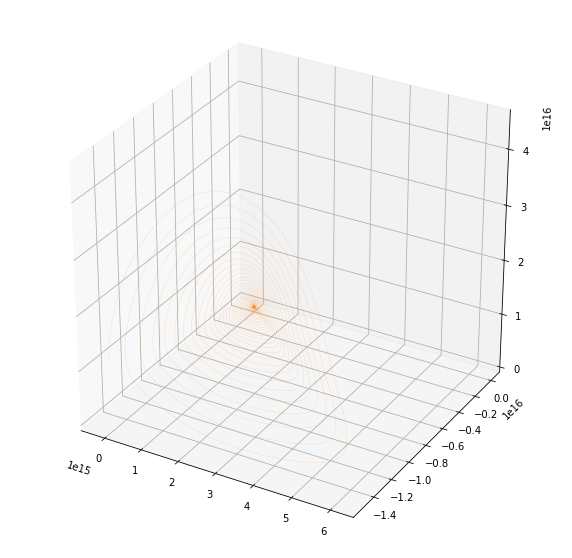

-----------------------------------------------------------
bs=1000 hs=100 lr=0.0001 wd=0.0 nhl=5
[ 1,  200] loss: 0.662720642909408
[ 1,  400] loss: 0.610095142498612
[ 1,  600] loss: 0.648151365593076
[ 1,  800] loss: 0.640310491696000
[ 1, 1000] loss: 0.608385665304959
[ 1, 1200] loss: 0.617829747349024
[ 1, 1400] loss: 0.613785464689136
[ 1, 1600] loss: 0.604877011999488
[ 1, 1800] loss: 0.572288882061839
[ 1, 2000] loss: 0.571734822355211
[ 1, 2200] loss: 0.561960958130658
[ 1, 2400] loss: 0.548462684862316
[ 1, 2600] loss: 0.551123530752957
[ 1, 2800] loss: 0.518713216669857
[ 1, 3000] loss: 0.537945472449064
[ 1, 3200] loss: 0.499305787645280
[ 1, 3400] loss: 0.477301547937095
[ 1, 3600] loss: 0.474336888827384
[ 1, 3800] loss: 0.450627301409841
[ 1, 4000] loss: 0.432363235503435
[ 1, 4200] loss: 0.383909085057676
[ 1, 4400] loss: 0.383413000442088
[ 1, 4600] loss: 0.395938912816346
[ 1, 4800] loss: 0.354088024850935
[ 2,  200] loss: 0.368502374552190
[ 2,  400] loss: 0.35221728

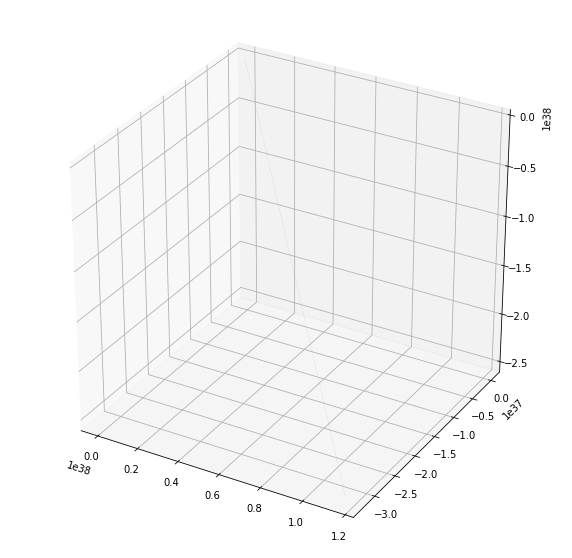

In [2]:
h = 1

hss = [100]
bss = [1000]
lrs = [0.0001]
wds = [0.0]
nhls = [3, 5]
epochs = 3


for bs in bss:
    dataset = CSVData(csv_file_path='third_model.csv', input_size=3)   
    train_loader, valid_loader = train_valid_loader(dataset, bs=bs)
    for hs in hss:
        for lr in lrs:
            for wd in wds:
                for nhl in nhls:
                    print('-----------------------------------------------------------')
                    print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 
                          'wd=' + str(wd), 'nhl=' + str(nhl))
                    model = EulerN(3, 1, hs, h, nhl)
                    criterion = nn.MSELoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    
                    for epoch in range(epochs):  # loop over the dataset multiple times
                        running_loss = 0.0
                        for i, data in enumerate(train_loader, 0):
                            # get the inputs; data is a list of [inputs, labels]
                            inputs, params, labels = data
                            
                            # zero the parameter gradients
                            optimizer.zero_grad()

                            # forward + backward + optimize
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            optimizer.step()

                            # print statistics
                            running_loss += loss.item()
                            if i % 200 == 199:    # print every 200 mini-batches
                                print('[%2d, %4d] loss: %.15f' %
                                        (epoch + 1, i + 1, running_loss / 200))
                                running_loss = 0.0
                                
                    print('Finished Training')
                        
                        
                    with torch.no_grad():
                        train_loss = 0.0
                        valid_loss = 0.0
                        criterion = nn.MSELoss()
                            
                        for data in train_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            train_loss += loss.item()
                                                        
                        for data in valid_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            valid_loss += loss.item()
                                
                        train_loss /= len(train_loader)
                        valid_loss /= len(valid_loader)
                                                        
                        print('Train loss: %.15f' % (train_loss,))
                        print('Valid loss: %.15f' % (valid_loss,))
                        
                        plot_3d_trajectory(vec_roessler_attractor, 0.2, model, np.array([5,5,5]))

-----------------------------------------------------------
bs=1000 hs=200 lr=0.01 wd=0.0 nhl=3
[ 1,  200] loss: 0.184262433990370
[ 1,  400] loss: 0.026929782447405
[ 1,  600] loss: 0.010649201087654
[ 1,  800] loss: 0.012858530996018
[ 1, 1000] loss: 0.012541443460213
[ 1, 1200] loss: 0.005693186518620
[ 1, 1400] loss: 0.003537825526437
[ 1, 1600] loss: 0.004529817071452
[ 1, 1800] loss: 0.003433704065392
[ 1, 2000] loss: 0.002999961526366
[ 1, 2200] loss: 0.008442749291135
[ 1, 2400] loss: 0.005458412234439
[ 1, 2600] loss: 0.005428281044879
[ 1, 2800] loss: 0.012611868647218
[ 1, 3000] loss: 0.002517257057043
[ 1, 3200] loss: 0.002912662292365
[ 1, 3400] loss: 0.010107934599801
[ 1, 3600] loss: 0.009277921008470
[ 1, 3800] loss: 0.018528476109204
[ 1, 4000] loss: 0.005209527713887
[ 1, 4200] loss: 0.002400770753447
[ 1, 4400] loss: 0.003968152471934
[ 1, 4600] loss: 0.002449717518030
[ 1, 4800] loss: 0.007230305371922


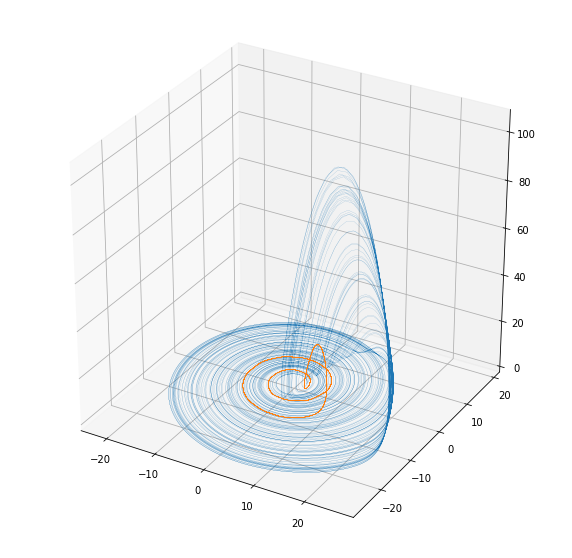

[ 2,  200] loss: 0.002096805236797
[ 2,  400] loss: 0.001944204947795
[ 2,  600] loss: 0.003663353918237
[ 2,  800] loss: 0.008106976171694
[ 2, 1000] loss: 0.004671105251909
[ 2, 1200] loss: 0.004931111113401
[ 2, 1400] loss: 0.008927109068609
[ 2, 1600] loss: 0.002712012865813
[ 2, 1800] loss: 0.016390622645413
[ 2, 2000] loss: 0.002212697862706
[ 2, 2200] loss: 0.001799066921521
[ 2, 2400] loss: 0.006394630588620
[ 2, 2600] loss: 0.006466806700482
[ 2, 2800] loss: 0.002636323595943
[ 2, 3000] loss: 0.004495943948132
[ 2, 3200] loss: 0.006164025528706
[ 2, 3400] loss: 0.001504408215042
[ 2, 3600] loss: 0.003244775631611
[ 2, 3800] loss: 0.001657299015496
[ 2, 4000] loss: 0.001601327083190
[ 2, 4200] loss: 0.003147898391326
[ 2, 4400] loss: 0.009946441925567
[ 2, 4600] loss: 0.008057172662229
[ 2, 4800] loss: 0.011961319522525


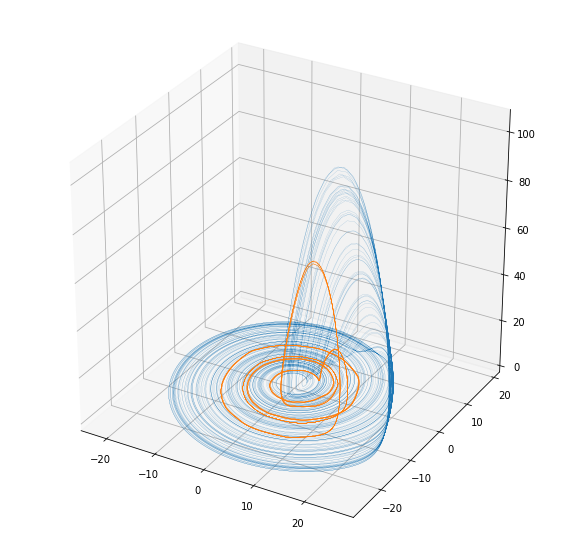

[ 3,  200] loss: 0.003121639974997
[ 3,  400] loss: 0.001878766239970
[ 3,  600] loss: 0.003217332148488
[ 3,  800] loss: 0.003920265624838
[ 3, 1000] loss: 0.004333580701350
[ 3, 1200] loss: 0.002875891443255
[ 3, 1400] loss: 0.003294074487494
[ 3, 1600] loss: 0.008091128989909
[ 3, 1800] loss: 0.003017371347814
[ 3, 2000] loss: 0.004701420632919
[ 3, 2200] loss: 0.006154999548089
[ 3, 2400] loss: 0.002121765368065
[ 3, 2600] loss: 0.003636546562193
[ 3, 2800] loss: 0.003975692554086
[ 3, 3000] loss: 0.001784375885909
[ 3, 3200] loss: 0.001788821117007
[ 3, 3400] loss: 0.002460804098664
[ 3, 3600] loss: 0.002403865851084
[ 3, 3800] loss: 0.004965761618078
[ 3, 4000] loss: 0.004302485456428
[ 3, 4200] loss: 0.001783690665325
[ 3, 4400] loss: 0.003960099494434
[ 3, 4600] loss: 0.005544177765987
[ 3, 4800] loss: 0.004686745899962


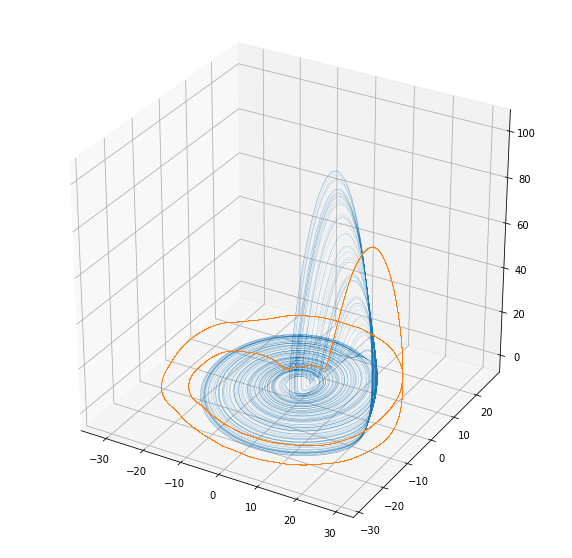

[ 4,  200] loss: 0.008935043364327
[ 4,  400] loss: 0.003479328251196
[ 4,  600] loss: 0.002716784510121
[ 4,  800] loss: 0.002137510684988
[ 4, 1000] loss: 0.003830865836062
[ 4, 1200] loss: 0.001771622737288
[ 4, 1400] loss: 0.004019727096747
[ 4, 1600] loss: 0.002293212758814
[ 4, 1800] loss: 0.003764881647803
[ 4, 2000] loss: 0.003224555573397
[ 4, 2200] loss: 0.001640305411493
[ 4, 2400] loss: 0.008711193380732
[ 4, 2600] loss: 0.005874277027033
[ 4, 2800] loss: 0.001558548042376
[ 4, 3000] loss: 0.001590988252428
[ 4, 3200] loss: 0.001322796433815
[ 4, 3400] loss: 0.011235171127046
[ 4, 3600] loss: 0.002199103800085
[ 4, 3800] loss: 0.002170575699129
[ 4, 4000] loss: 0.002618954402860
[ 4, 4200] loss: 0.001927014300600
[ 4, 4400] loss: 0.001658626271092
[ 4, 4600] loss: 0.003072230151738
[ 4, 4800] loss: 0.001912132565776


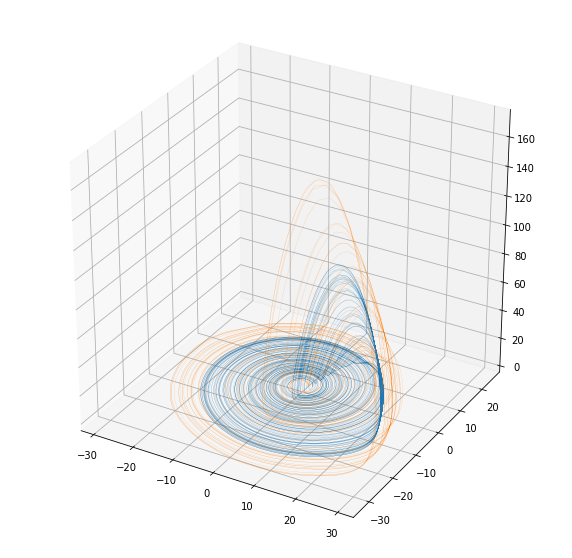

[ 5,  200] loss: 0.002768114379433
[ 5,  400] loss: 0.001526060639444
[ 5,  600] loss: 0.002806103207695
[ 5,  800] loss: 0.010030448259786
[ 5, 1000] loss: 0.002928789608122
[ 5, 1200] loss: 0.001077028535728
[ 5, 1400] loss: 0.001895306560036
[ 5, 1600] loss: 0.006521884438116
[ 5, 1800] loss: 0.003936040149274
[ 5, 2000] loss: 0.002823739099840
[ 5, 2200] loss: 0.004104259303131
[ 5, 2400] loss: 0.002078265683376
[ 5, 2600] loss: 0.002478655006998
[ 5, 2800] loss: 0.002925216317963
[ 5, 3000] loss: 0.001468517658359
[ 5, 3200] loss: 0.002621857155318
[ 5, 3400] loss: 0.002192911022867
[ 5, 3600] loss: 0.002174900351529
[ 5, 3800] loss: 0.002990793144854
[ 5, 4000] loss: 0.002636056985502
[ 5, 4200] loss: 0.007367384683457
[ 5, 4400] loss: 0.003916435836873
[ 5, 4600] loss: 0.001276531641561
[ 5, 4800] loss: 0.000986564899504


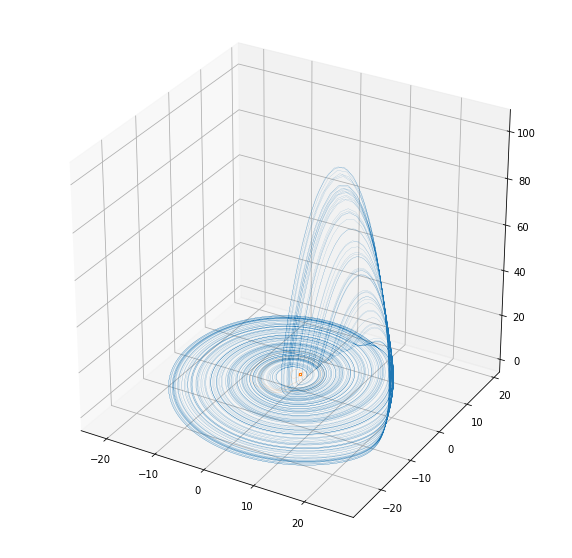

[ 6,  200] loss: 0.001077022587197
[ 6,  400] loss: 0.001526076210721
[ 6,  600] loss: 0.003025519508956
[ 6,  800] loss: 0.003127702225029
[ 6, 1000] loss: 0.003384247686918
[ 6, 1200] loss: 0.007149262429739
[ 6, 1400] loss: 0.003390062364051
[ 6, 1600] loss: 0.003011728028505
[ 6, 1800] loss: 0.001355498583580
[ 6, 2000] loss: 0.002055779516231
[ 6, 2200] loss: 0.002150758078715
[ 6, 2400] loss: 0.002511175020627
[ 6, 2600] loss: 0.001987691807881
[ 6, 2800] loss: 0.002775892328063
[ 6, 3000] loss: 0.004511771332327
[ 6, 3200] loss: 0.001024380121817
[ 6, 3400] loss: 0.002307508537924
[ 6, 3600] loss: 0.001518679781293
[ 6, 3800] loss: 0.001373797065171
[ 6, 4000] loss: 0.001970663485918
[ 6, 4200] loss: 0.007733513610146
[ 6, 4400] loss: 0.002324428830470
[ 6, 4600] loss: 0.000772323306373
[ 6, 4800] loss: 0.000680869312491


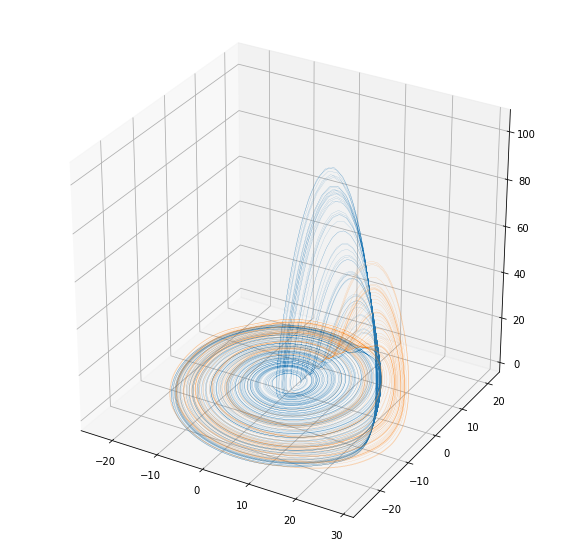

[ 7,  200] loss: 0.004171434228338
[ 7,  400] loss: 0.002345205058809
[ 7,  600] loss: 0.003329947552993
[ 7,  800] loss: 0.002048615457461
[ 7, 1000] loss: 0.001019052002157
[ 7, 1200] loss: 0.001302626025135
[ 7, 1400] loss: 0.002053308121831
[ 7, 1600] loss: 0.002169663492532
[ 7, 1800] loss: 0.001346335806375
[ 7, 2000] loss: 0.003551677414362
[ 7, 2200] loss: 0.002081651734552
[ 7, 2400] loss: 0.001557275045561
[ 7, 2600] loss: 0.001409894104800
[ 7, 2800] loss: 0.003306373271553
[ 7, 3000] loss: 0.007332412637043
[ 7, 3200] loss: 0.002962482459698
[ 7, 3400] loss: 0.001462113143061
[ 7, 3600] loss: 0.001579977221627
[ 7, 3800] loss: 0.002028678757051
[ 7, 4000] loss: 0.002634002790437
[ 7, 4200] loss: 0.003488477926439
[ 7, 4400] loss: 0.001233200236893
[ 7, 4600] loss: 0.001756422002218
[ 7, 4800] loss: 0.001158176432291


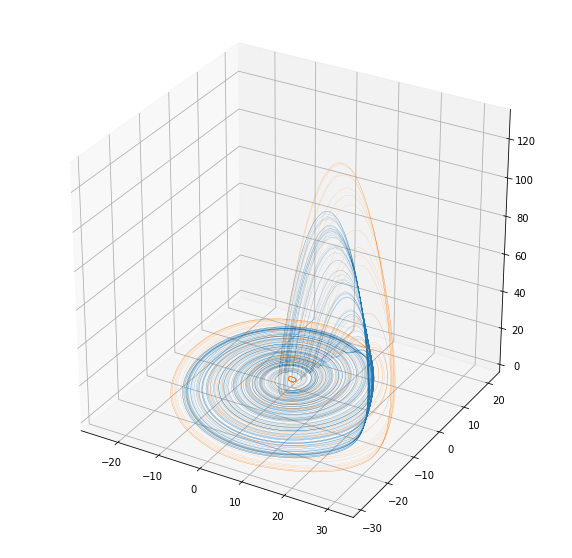

[ 8,  200] loss: 0.005313454284187
[ 8,  400] loss: 0.002394490249717
[ 8,  600] loss: 0.000986048085251
[ 8,  800] loss: 0.004326087102745
[ 8, 1000] loss: 0.001310326237945
[ 8, 1200] loss: 0.001363595345319
[ 8, 1400] loss: 0.001991162158447
[ 8, 1600] loss: 0.002060325455968
[ 8, 1800] loss: 0.002257481884808
[ 8, 2000] loss: 0.001081275691977
[ 8, 2200] loss: 0.001601536254966
[ 8, 2400] loss: 0.002285963797476
[ 8, 2600] loss: 0.010068051232956
[ 8, 2800] loss: 0.001922850374540
[ 8, 3000] loss: 0.002373492636398
[ 8, 3200] loss: 0.002102944384969
[ 8, 3400] loss: 0.001746093744150
[ 8, 3600] loss: 0.002066838340324
[ 8, 3800] loss: 0.003186216349859
[ 8, 4000] loss: 0.001337679391727
[ 8, 4200] loss: 0.001888104141835
[ 8, 4400] loss: 0.001968081682135
[ 8, 4600] loss: 0.001865977714333
[ 8, 4800] loss: 0.001288613397555


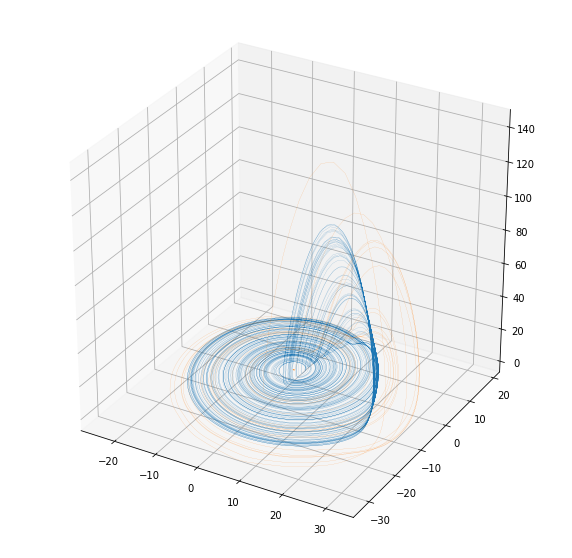

[ 9,  200] loss: 0.003812682583521
[ 9,  400] loss: 0.001653384141246
[ 9,  600] loss: 0.001835331920156
[ 9,  800] loss: 0.003860575902218
[ 9, 1000] loss: 0.000969152270336
[ 9, 1200] loss: 0.001627722384292
[ 9, 1400] loss: 0.001985054792312
[ 9, 1600] loss: 0.005366800868360
[ 9, 1800] loss: 0.001051661687306
[ 9, 2000] loss: 0.000758150755864
[ 9, 2200] loss: 0.001768258913871
[ 9, 2400] loss: 0.005533923978801
[ 9, 2600] loss: 0.002625737980707
[ 9, 2800] loss: 0.001029122110776
[ 9, 3000] loss: 0.001633869983198
[ 9, 3200] loss: 0.001290323094436
[ 9, 3400] loss: 0.001911231992271
[ 9, 3600] loss: 0.001292054890728
[ 9, 3800] loss: 0.001035511532027
[ 9, 4000] loss: 0.001607364104711
[ 9, 4200] loss: 0.002710781352507
[ 9, 4400] loss: 0.001353571594009
[ 9, 4600] loss: 0.002854624561587
[ 9, 4800] loss: 0.002167195536094


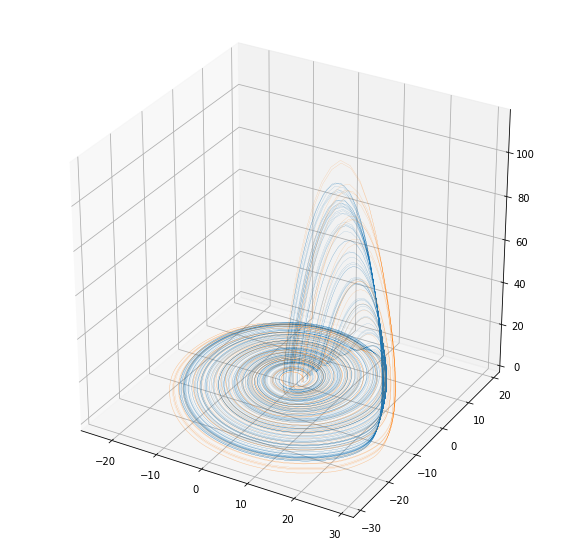

[10,  200] loss: 0.001245512720125
[10,  400] loss: 0.011430094027310
[10,  600] loss: 0.001171227298619
[10,  800] loss: 0.001496094789109
[10, 1000] loss: 0.001572417453499
[10, 1200] loss: 0.001215463665503
[10, 1400] loss: 0.000877799399823
[10, 1600] loss: 0.003108896524354
[10, 1800] loss: 0.002027699190658
[10, 2000] loss: 0.000954507693750
[10, 2200] loss: 0.001330863418480
[10, 2400] loss: 0.002580447651198
[10, 2600] loss: 0.004070017389167
[10, 2800] loss: 0.001117579492711
[10, 3000] loss: 0.001506841421797
[10, 3200] loss: 0.002531018747468
[10, 3400] loss: 0.001965607869934
[10, 3600] loss: 0.005657101617107
[10, 3800] loss: 0.001746911108421
[10, 4000] loss: 0.001121976873110
[10, 4200] loss: 0.000909919176265
[10, 4400] loss: 0.001347879248424
[10, 4600] loss: 0.004055781450952
[10, 4800] loss: 0.002446634190710


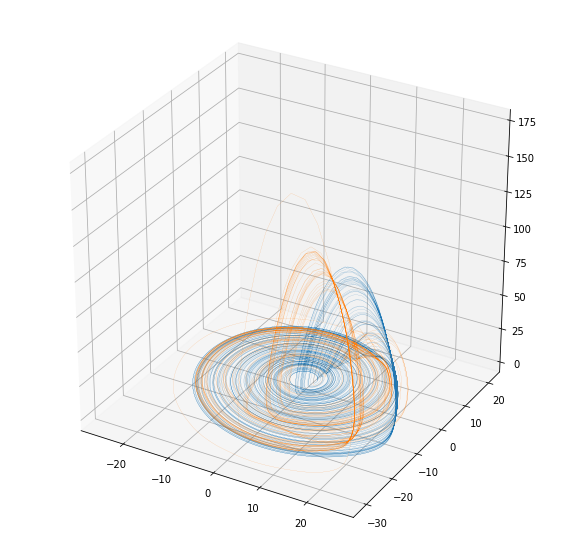

Finished Training
Train loss: 0.000819630079232
Valid loss: 0.000798730409115


In [2]:
h = 1

hss = [200]
bss = [1000]
lrs = [0.01]
wds = [0.0]
nhls = [3]
epochs = 10


for bs in bss:
    dataset = CSVData(csv_file_path='third_model.csv', input_size=3)   
    train_loader, valid_loader = train_valid_loader(dataset, bs=bs)
    for hs in hss:
        for lr in lrs:
            for wd in wds:
                for nhl in nhls:
                    print('-----------------------------------------------------------')
                    print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 
                          'wd=' + str(wd), 'nhl=' + str(nhl))
                    model = EulerN(3, 1, hs, h, nhl)
                    criterion = nn.MSELoss()
                    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                    
                    for epoch in range(epochs):  # loop over the dataset multiple times
                        running_loss = 0.0
                        for i, data in enumerate(train_loader, 0):
                            # get the inputs; data is a list of [inputs, labels]
                            inputs, params, labels = data
                            
                            # zero the parameter gradients
                            optimizer.zero_grad()

                            # forward + backward + optimize
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            loss.backward()
                            optimizer.step()

                            # print statistics
                            running_loss += loss.item()
                            if i % 200 == 199:    # print every 200 mini-batches
                                print('[%2d, %4d] loss: %.15f' %
                                        (epoch + 1, i + 1, running_loss / 200))
                                running_loss = 0.0
                        
                        plot_3d_trajectory(vec_roessler_attractor, 0.2, model, np.array([5,5,5]))
                        
                    print('Finished Training')
                        
                        
                    with torch.no_grad():
                        train_loss = 0.0
                        valid_loss = 0.0
                        criterion = nn.MSELoss()
                            
                        for data in train_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            train_loss += loss.item()
                                                        
                        for data in valid_loader:
                            inputs, params, labels = data
                            outputs = model(inputs, params)
                            loss = criterion(outputs, labels)
                            valid_loss += loss.item()
                                
                        train_loss /= len(train_loader)
                        valid_loss /= len(valid_loader)
                                                        
                        print('Train loss: %.15f' % (train_loss,))
                        print('Valid loss: %.15f' % (valid_loss,))

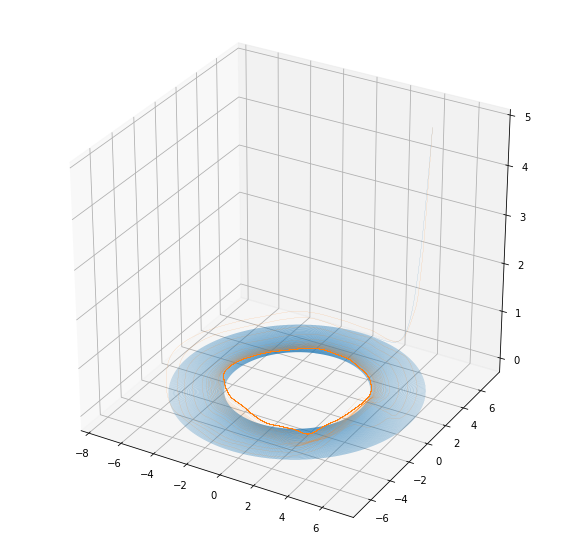

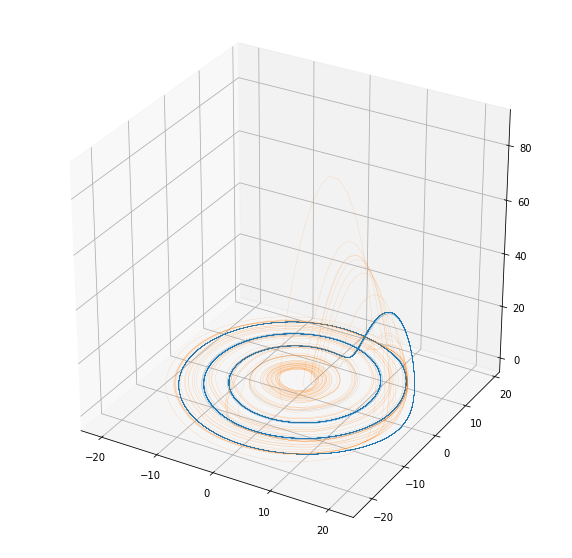

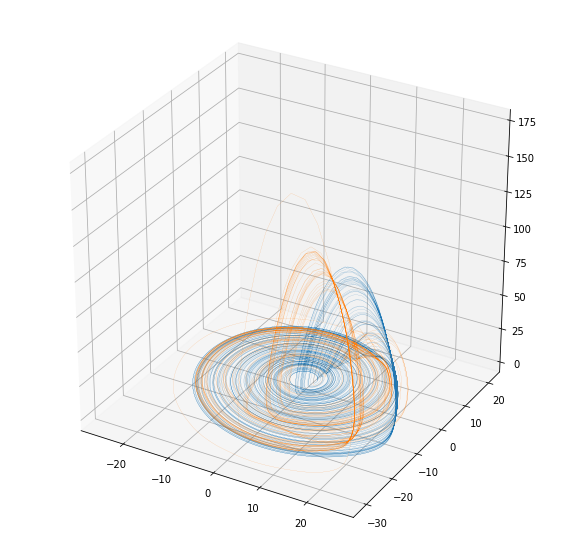

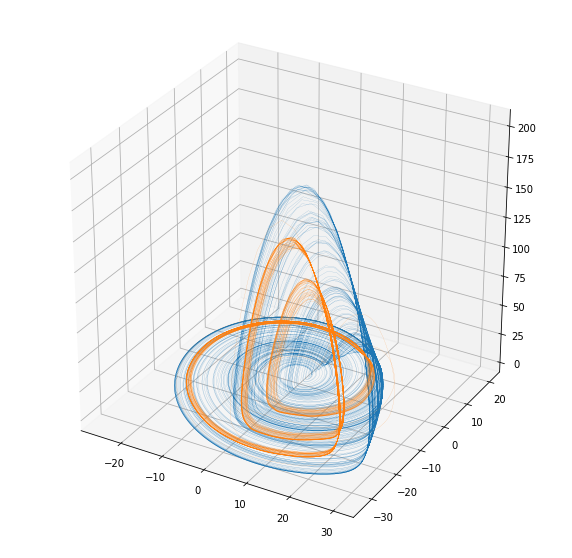

In [6]:
plot_3d_trajectory(vec_roessler_attractor,  0.0, model, np.array([5,5,5]))
plot_3d_trajectory(vec_roessler_attractor,  0.1, model, np.array([5,5,5]))
plot_3d_trajectory(vec_roessler_attractor,  0.2, model, np.array([5,5,5]))
plot_3d_trajectory(vec_roessler_attractor,  0.3, model, np.array([5,5,5]))